In [ ]:
import pandas as pd
df_SCFI = pd.read_csv(r'scfi.csv')
df_SCFI

In [ ]:
!pip install -q prophet
!pip install -q lightgbm

In [ ]:
from prophet import Prophet
import numpy as np

In [ ]:
import math

In [ ]:
!pip install -q statsmodels
!pip install -q matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_SCFI.shape

(120, 2)

In [ ]:
df_SCFI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    120 non-null    object 
 1   Value   120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [ ]:
df_SCFI['Date'].max()

'9/9/2022'

In [ ]:
# Assuming df_SCFI is the DataFrame 
df_SCFI.columns = ['Date', 'Value']
df_SCFI['Date'] = pd.to_datetime(df_SCFI['Date'], format='%d/%m/%Y').dt.normalize()


In [ ]:
df_SCFI

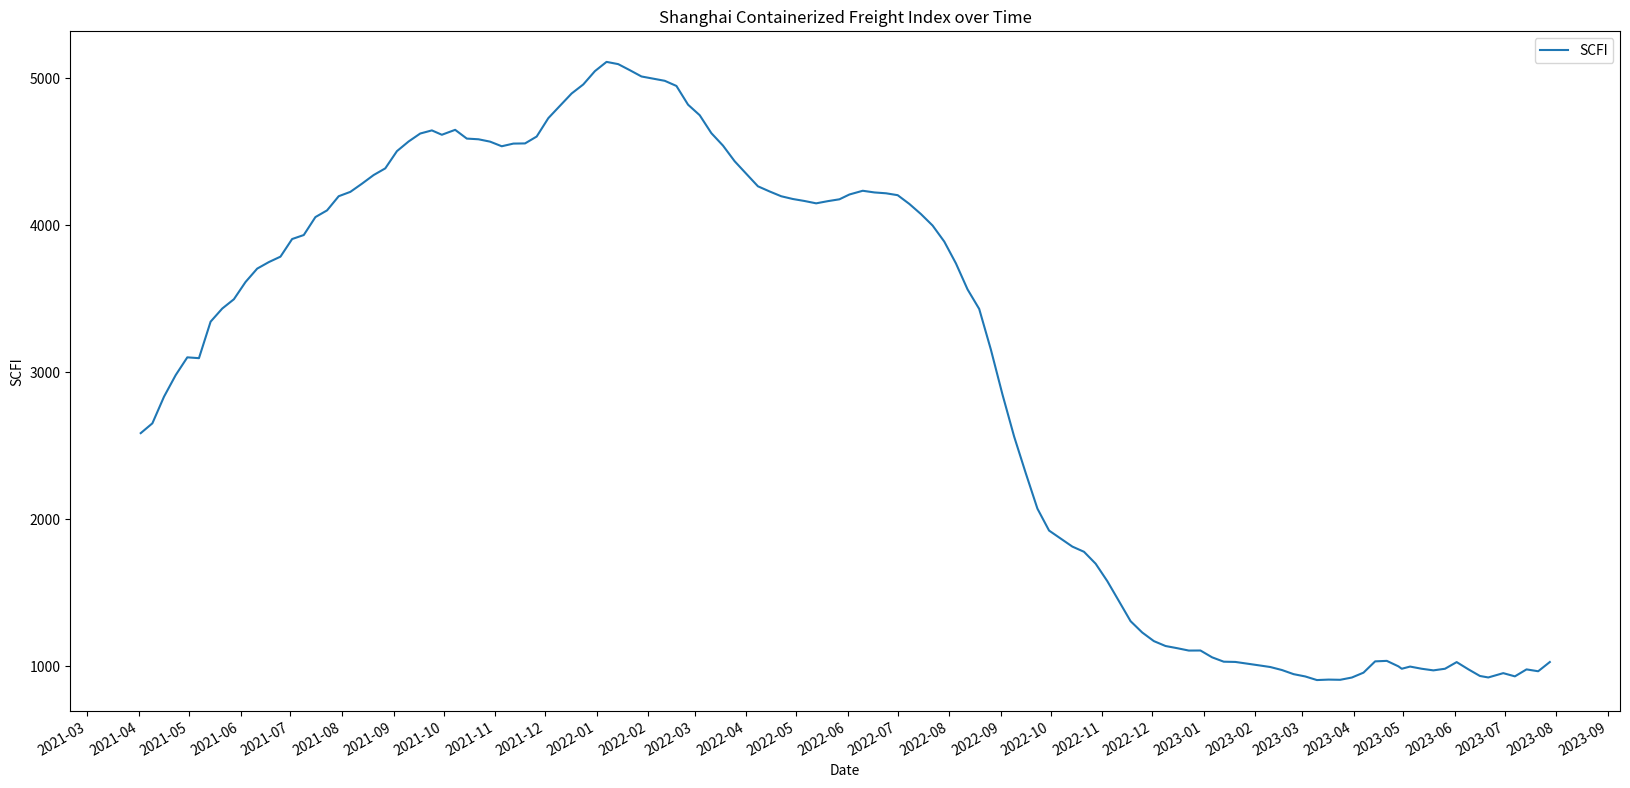

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'Value' column to numeric
df_SCFI['Value'] = pd.to_numeric(df_SCFI['Value'], errors='coerce')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the 'Value' column
ax.plot(df_SCFI['Date'], df_SCFI['Value'], label='SCFI')

# Set the title and labels
plt.title('Shanghai Containerized Freight Index over Time')
plt.xlabel('Date')
plt.ylabel('SCFI')

# Format the x-axis to display dates in a more readable format
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate date labels automatically
fig.autofmt_xdate()

# Show the legend
plt.legend()

# Show grid
plt.grid(False)

# Show the plot
plt.show()

In [ ]:
df_SCFI

04:05:51 - cmdstanpy - INFO - Chain [1] start processing


04:05:51 - cmdstanpy - INFO - Chain [1] done processing


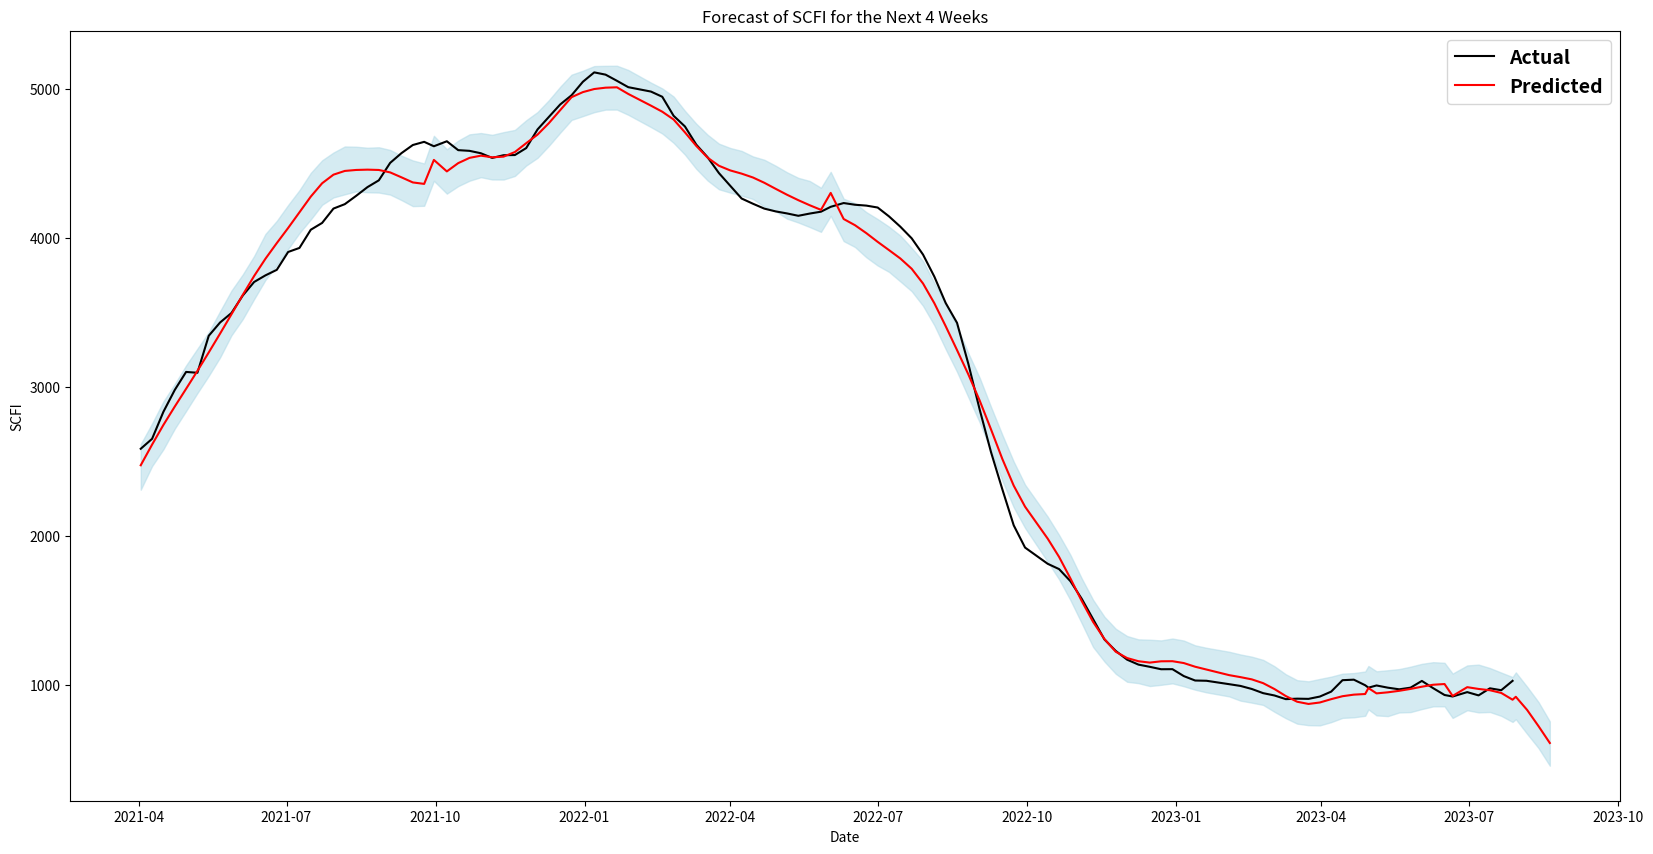

In [ ]:
# Import the necessary library
from prophet import Prophet

# Preparing the data for Prophet
df_prophet = df_SCFI[['Date', 'Value']].rename(columns={'Date': 'ds', 'Value': 'y'})

# Initializing the model
model = Prophet()

# Fitting the model with the data
model.fit(df_prophet)

# Creating a dataframe for future predictions
future = model.make_future_dataframe(periods=4, freq='W')

# Making predictions
forecast = model.predict(future)

# Plotting the forecast
fig, ax = plt.subplots(figsize=(20, 10))

# Add labels to the plot
ax.plot(df_prophet['ds'], df_prophet['y'], label='Actual', color='black')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')

# Change the color of the uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.5)

ax.set_title('Forecast of SCFI for the Next 4 Weeks')
ax.set_xlabel('Date')
ax.set_ylabel('SCFI')

# Increase the size and boldness of the legend
ax.legend(prop={'size': 14, 'weight': 'bold'})

plt.show()
